# Exo Matplotlib/Seaborn avec JO-dataset

0. __Pour chaque graphique, ajouter un titre qui contient les axes/colonnes utilisé pour le graphique__ 
    - __attention:__ pour chaque graphique, il faudra appiquer une transformation sur le data pour qu'il soit adapté à la construction des graphiques demandé <br><br>

  
1. __Faire un (line-)plot qui montre:__<br>
    - le nombre uniques de sports par année
    - placer des points comme marqueurs
    - changer le style de ligne en pointillé
<br><br>

2. __Faire un graphique composé qui montre:__<br>
    - le nombre uniques de sports par année (voir 1.)
    - avec une décomposition par genre homme-femme, indiqué dans une légende
    - changer les couleurs en 'cyan' et 'magenta'
    - appliquer un 'alpha' de '0.5'
    - changer la légende de position: en bas à gauche
<br><br>
3. __Faire un bar-plot qui montre:__<br>
    - le top 10 des noms 
    - qui ont participés aux plus de sports différents, 
    - trié par: nombre de sports différents, nombre de médailles
    - changer l'orientation des labels sur l'axe-x ('xticks')
    - changer le nom de l'axe-x: 'top 10' ('xlabel')
<br><br>

4. __Faire un pie-plot qui montre les info de 'Carl Schuhmann':__<br>

    - le nombre de médailles (confondues) pour chaque sport
    - avec le type de sport pour lequel cet athlète a le plus de medailles, mis en évidence
<br><br>

5. __Faire un histogramme qui montre:__<br>
    - l'age
    - par tranche d'age de 3 années
<br><br>

6. __Faire graphique composé d' histogrammes qui montre:__ <br>
    - la taille (height)
    - par tranche de 4 cm
    - decomposé par homme-femme
    - avec un alpha = 0.6

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('data/Exercices_Pandas_athlete_events.csv')

In [1]:
import seaborn as sns

1. __Faire un (line-)plot qui montre:__<br>
    - le nombre uniques de sports par année
    - placer des points comme marqueurs
    - changer le style de ligne en pointillé
<br><br>

In [ ]:
df1= df[['Sport', 'Year']].groupby(['Year'], as_index=False).nunique()


<function matplotlib.pyplot.show(close=None, block=None)>

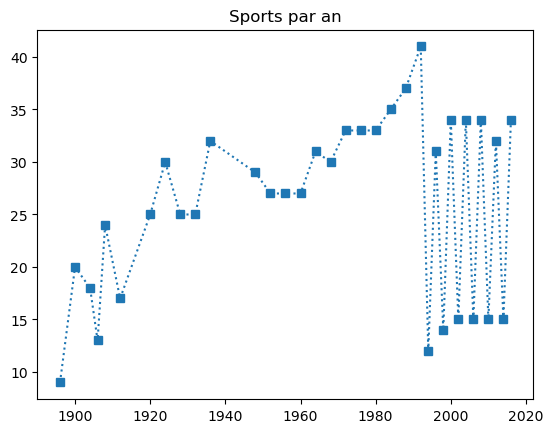

In [112]:
plt.title('Sports par an')

plt.plot(df1['Year']
         ,df1['Sport']
         ,linestyle =':'
         ,marker = 's')

plt.show

2. __Faire un graphique composé qui montre:__<br>
    - le nombre uniques de sports par année (voir 1.)
    - avec une décomposition par genre homme-femme, indiqué dans une légende
    - changer les couleurs en 'cyan' et 'magenta'
    - appliquer un 'alpha' de '0.5'
    - changer la légende de position: en bas à gauche
<br><br>

In [104]:
print(df.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


In [113]:
df = df.groupby(['Year', 'Sex'])['Sport'].nunique().unstack(fill_value=0)
print(df.columns)


Index(['F', 'M'], dtype='object', name='Sex')


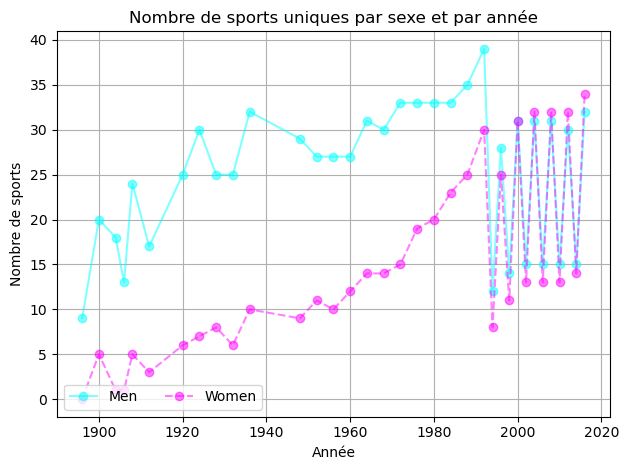

In [121]:
men = df['M'] 
women = df ['F']


plt.plot(men.index, men.values, label='Men', marker='o', linestyle='-', color='cyan', alpha=0.5)
plt.plot(women.index, women.values, label='Women', marker='o', linestyle='--', color='magenta', alpha=0.5)

plt.title('Nombre de sports uniques par sexe et par année')
plt.xlabel('Année')
plt.ylabel('Nombre de sports')
plt.legend(loc='lower left', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


3. __Faire un bar-plot qui montre:__<br>
    - le top 10 des noms 
    - qui ont participés aux plus de sports différents, 
    - trié par: nombre de sports différents, nombre de médailles
    - changer l'orientation des labels sur l'axe-x ('xticks')
    - changer le nom de l'axe-x: 'top 10' ('xlabel')
<br><br>

In [131]:
df=df.groupby('Name')['Sport'].nunique().sort_values(ascending=False).head(10).reset_index()
df

,Name,Sport
0,Kim Seong-Eun,5
1,Wang Nan,5
2,Wolfgang Mller,5
3,Zhang Li,5
4,Jos Gonzlez,4
5,Karl Johan Baadsvik,4
6,Bla Nagy,4
7,Bronisaw Czech,4
8,Alexander Viggo Jensen,4
9,Ivan Ivanov,4


In [6]:
df = pd.read_csv('data/Exercices_Pandas_athlete_events.csv')

top_athletes = (
    df.groupby('Name')['Sport']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_athletes

,Name,Sport
0,Kim Seong-Eun,5
1,Wang Nan,5
2,Wolfgang Mller,5
3,Zhang Li,5
4,Jos Gonzlez,4
5,Karl Johan Baadsvik,4
6,Bla Nagy,4
7,Bronisaw Czech,4
8,Alexander Viggo Jensen,4
9,Ivan Ivanov,4


In [7]:


# Rename columns for clarity
top_athletes.columns = ['Name', 'Number_of_Sports']

# Display
print(top_athletes)


                     Name  Number_of_Sports
0           Kim Seong-Eun                 5
1                Wang Nan                 5
2          Wolfgang Mller                 5
3                Zhang Li                 5
4             Jos Gonzlez                 4
5     Karl Johan Baadsvik                 4
6                Bla Nagy                 4
7          Bronisaw Czech                 4
8  Alexander Viggo Jensen                 4
9             Ivan Ivanov                 4


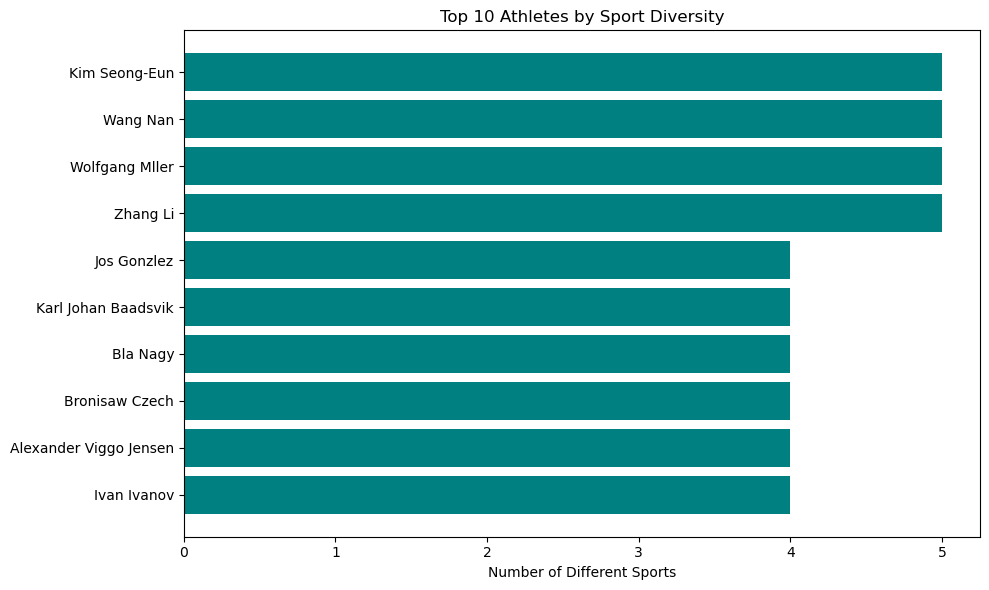

In [125]:
plt.figure(figsize=(10,6))
plt.barh(top_athletes['Name'], top_athletes['Number_of_Sports'], color='teal')
plt.xlabel('Number of Different Sports')
plt.title('Top 10 Athletes by Sport Diversity')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

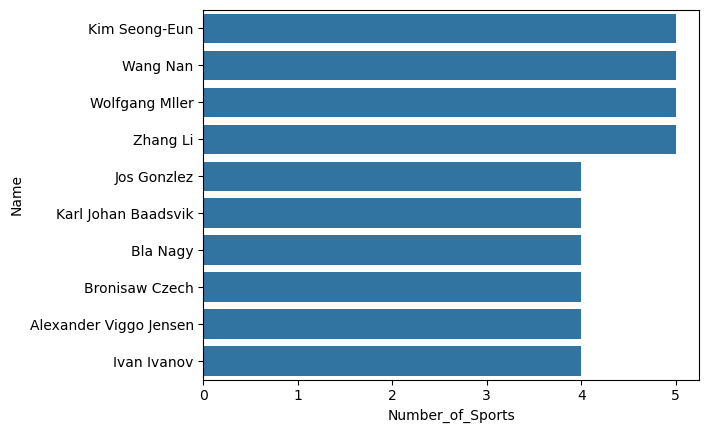

In [8]:
sns.barplot(data=top_athletes,x ='Number_of_Sports', y ='Name')
plt.show

4. __Faire un pie-plot qui montre les info de 'Carl Schuhmann':__<br>

    - le nombre de médailles (confondues) pour chaque sport
    - avec le type de sport pour lequel cet athlète a le plus de medailles, mis en évidence
<br><br>


In [138]:
df = pd.read_csv('data/Exercices_Pandas_athlete_events.csv')

df= df[df['Medal'].notna()]

df= df[df['Name']=='Carl Schuhmann']
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
214346,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,Gold
214348,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold
214351,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",Gold
214352,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",Gold


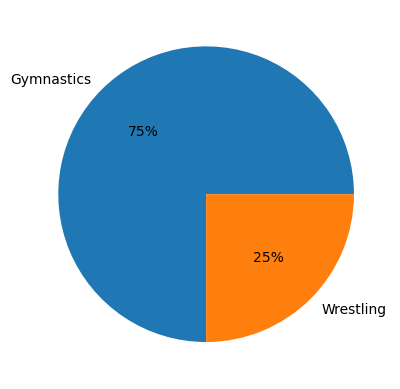

In [176]:
df = pd.read_csv('data/Exercices_Pandas_athlete_events.csv')

df= df[df['Medal'].notna()]

df= df[df['Name']=='Carl Schuhmann']
medals_per_sport = df['Sport'].value_counts()
plt.pie(medals_per_sport, labels=medals_per_sport.index, autopct='%1.0f%%')
plt.show()

5. __Faire un histogramme qui montre:__<br>
    - l'age
    - par tranche d'age de 3 années
<br><br>

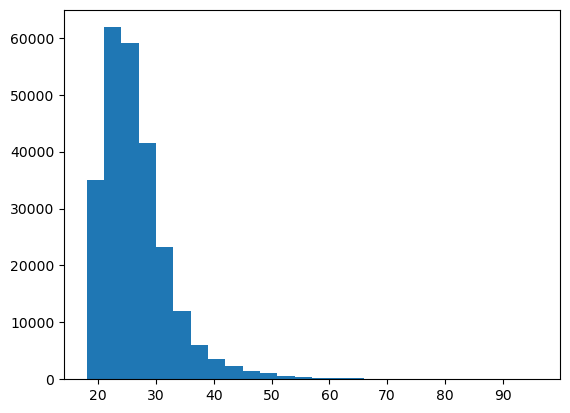

In [11]:
df = pd.read_csv('data/Exercices_Pandas_athlete_events.csv')

df= df['Age'].dropna()

plt.hist( df, bins=range(18,97,3))

plt.show()


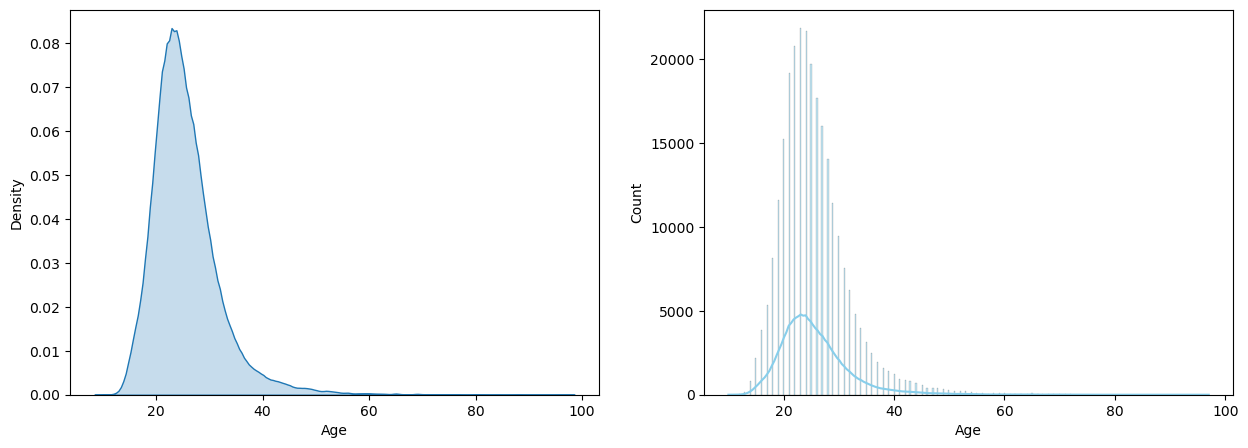

In [32]:
df = pd.read_csv('data/Exercices_Pandas_athlete_events.csv')

ages = df['Age'].dropna()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(x=ages, fill=True)



plt.subplot(1,2,2)


sns.histplot(x=ages, kde=True, color='skyblue')


plt.show()

6. __Faire graphique composé d' histogrammes qui montre:__ <br>
    - la taille (height)
    - par tranche de 4 cm
    - decomposé par homme-femme
    - avec un alpha = 0.6

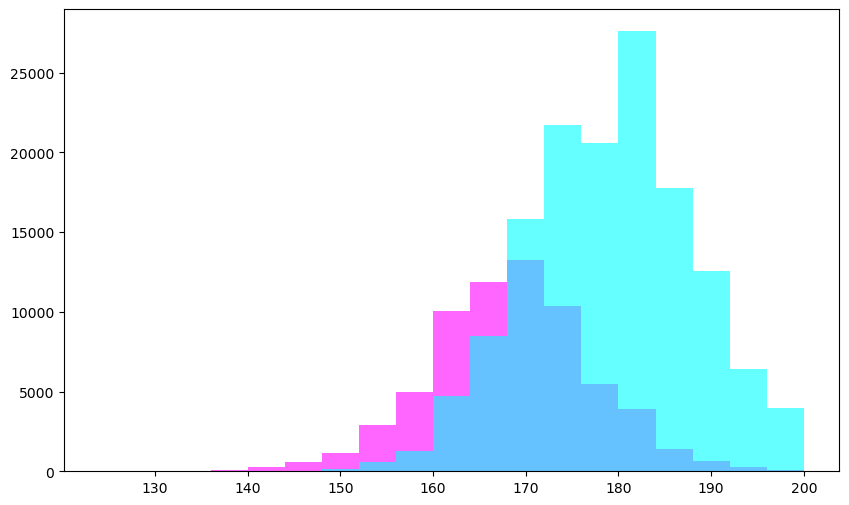

In [38]:
df = pd.read_csv('data/Exercices_Pandas_athlete_events.csv')
df= df.dropna(subset=['Height', 'Sex'])

male_heights = df[df['Sex'] == 'M']['Height']
female_heights = df[df['Sex'] == 'F']['Height']

plt.figure(figsize=(10, 6))

plt.hist(
    [male_heights, female_heights],
    bins=np.arange(124, 204, 4),
    label=['Men', 'Women'],
    color=['cyan', 'magenta'],
    alpha=0.6,
    histtype='stepfilled'
)

plt.show()


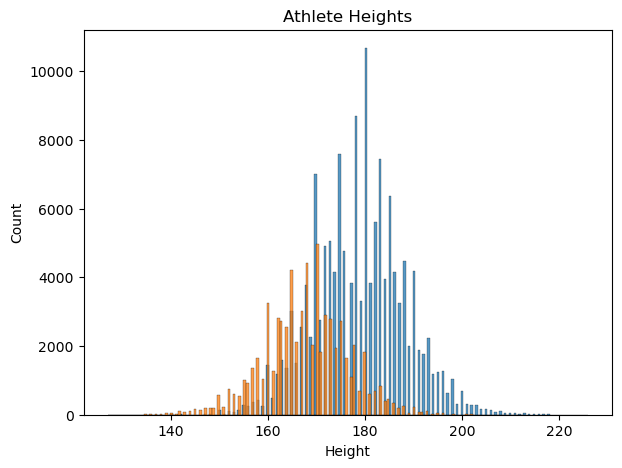

In [37]:
df = pd.read_csv('data/Exercices_Pandas_athlete_events.csv')

male_heights = df[df['Sex'] == 'M']['Height']
female_heights = df[df['Sex'] == 'F']['Height']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=male_heights, fill=True)
sns.histplot(x=female_heights, fill=True)
plt.title('Athlete Heights')


plt.show()